In [4]:
import pandas as pd
df = pd.read_csv("2019.csv")
df = df.drop(columns=["Country or region"])  

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])

In [6]:
# Split the data
X = df_scaled.drop(columns=["Score"])  # Features
y = df_scaled["Score"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialization
model = LinearRegression()

# Training
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

📊 Model Evaluation:
Mean Absolute Error (MAE): 0.1079
Mean Squared Error (MSE): 0.0194
R² Score: 0.9771


#### As the below points are closer to the line, the prediction of the model is good

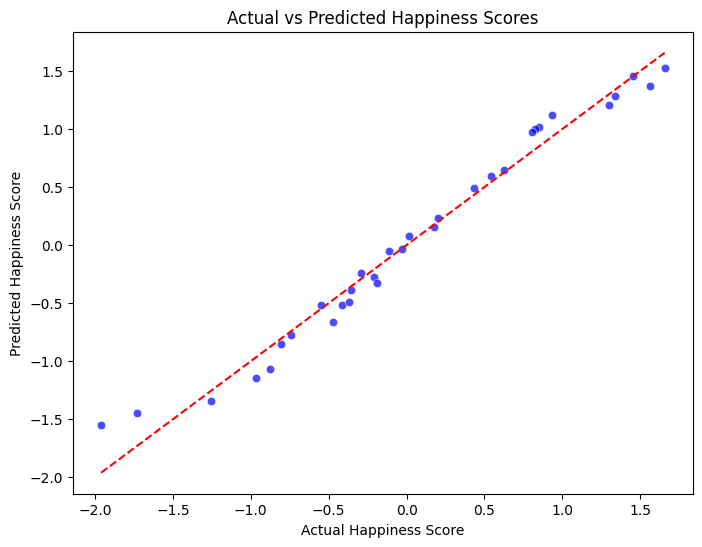

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # 45-degree line
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Actual vs Predicted Happiness Scores")
plt.show()

In [11]:
import joblib

joblib.dump(model, "happiness_model.pkl")
print("✅ Model saved successfully!")

✅ Model saved successfully!


In [12]:
loaded_model = joblib.load("happiness_model.pkl")

sample_prediction = loaded_model.predict(X_test[:5])
print("🔮 Sample Predictions:", sample_prediction)

🔮 Sample Predictions: [-0.38501547  0.15394747 -0.05059393  0.07658943 -0.77858778]
